In [17]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython.display
import essentia
import essentia.standard as es
import librosa
import librosa.display
from collections import Counter
from utils import * 
import seaborn as sns

In [135]:
def heatmap_count_amplitude(var1):
    countername = []
    elements = []
    for elem in var1:
        c = elem[1]
        elements.append(c)
    elements2 = []
    for elem in var1:
        d = elem[0]
        elements2.append(d)
    # some hiccup happened here with a beforehand:
    a = [0, 0.00001, 0.01, 0.1, 0.20, 0.30, 0.4, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 5, 10, 20, 30, 50] 
    lista = []
    for myNumber in elements:
        b = min(a, key = lambda x:abs(x-myNumber))
        b = "%.5f" %b
        lista.append(float(b))
    
    lista = sorted(lista)
    countername = Counter(lista)
    print countername[50]
    print countername[30]
    print countername[20]
    print countername[10]
    print countername[5]
    print countername[3]
    print countername[2.75]
    print countername[2.5]
    print countername[2.25]
    print countername[2]
    print countername[1.75]
    print countername[1.5]
    print countername[1.25]
    print countername[1]
    print countername[0.75]
    print countername[0.5]
    print countername[0.4]
    print countername[0.3]
    print countername[0.2]
    print countername[0.1]
    print countername[0.01]
    print countername[0.00001]
    print countername[0]   

In [32]:
def amplitude_drummer2(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer1/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer1/' + 'onset.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

def amplitude_drummer2_bass(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer1/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer1/bass/' + 'onset.bass.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer2_bass(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer1/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer1/bass/' + 'onset.bass.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer2_cymbals(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer1/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer1/cymbals/' + 'onset.cymbals.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer2_hihat(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer1/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer1/hihat/' + 'onset.hihat.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer2_snare(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer1/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer1/snare/' + 'onset.snare.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

def amplitude_drummer2_toms(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer1/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer1/toms/' + 'onset.toms.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

In [46]:
def amplitude_drummer2(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer2/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer2/' + 'onset.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

def amplitude_drummer2_bass(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer2/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer2/bass/' + 'onset.bass.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer2_cymbals(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer2/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer2/cymbals/' + 'onset.cymbals.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer2_hihat(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer2/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer2/hihat/' + 'onset.hihat.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer2_snare(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer2/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer2/snare/' + 'onset.snare.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

def amplitude_drummer2_toms(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer2/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer2/toms/' + 'onset.toms.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

In [117]:
def amplitude_drummer3(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer3/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer3/' + 'onset.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

def amplitude_drummer3_bass(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer3/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer3/bass/' + 'onset.bass.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer3_cymbals(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer3/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer3/cymbals/' + 'onset.cymbals.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer3_hihat(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer3/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer3/hihat/' + 'onset.hihat.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer3_snare(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer3/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer3/snare/' + 'onset.snare.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

def amplitude_drummer3_toms(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer3/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer3/toms/' + 'onset.toms.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)
    
def amplitude_drummer3_lmt(filename, first_downbeat, last_four, counted_beats):
    idealSixteenths = []
    loud_test = []
    loud_frame = []
    frame = []
    onsets = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    load_file = 'sounds/drummer3/' + filename
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    last_beat = counted_beats * 4 - 4
    counted_beats = counted_beats * 4 - 3
    idealSixteenths = np.linspace(first_downbeat, last_four, counted_beats)
    diff_six = idealSixteenths[2]-idealSixteenths[1]
    for i in [1,2,3]:
        added_six = idealSixteenths[last_beat] + diff_six*i
        idealSixteenths = np.append(idealSixteenths, added_six)
        
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/drummer3/lmt/' + 'onset.lmt.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)
        # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

In [44]:
############### DRUMMER1 ############### 
# Global count of deviations: 1274

loud_values = []
############ DISCO ############

#amplitude_drummer2_toms('036_phrase_disco_simple_slow_sticks.wav', 0.831 , 11.141, 16) #fills at the end
#amplitude_drummer2_toms('037_phrase_disco_simple_medium_sticks.wav', 0.804 , 9.361, 16) #fills at the end
#amplitude_drummer2_toms('038_phrase_disco_simple_fast_sticks.wav', 0.569 , 7.832, 16) #fills at the end
amplitude_drummer2_toms('039_phrase_disco_complex_slow_sticks.wav', 0.781 , 10.581, 16) #edited out bass drum, snare for last beat
amplitude_drummer2_toms('040_phrase_disco_complex_medium_sticks.wav', 0.996 , 9.046, 16) # last bd edited out
amplitude_drummer2_toms('041_phrase_disco_complex_fast_sticks.wav', 0.588 , 7.592, 16) #last 2 fill-beats edited out

############ ROCK ############

#amplitude_drummer2_toms('042_phrase_rock_simple_slow_rods.wav', 0.736 , 14.045, 16)  #fills at the end
#amplitude_drummer2_toms('043_phrase_rock_simple_medium_rods.wav', 0.7 , 11.335, 16)  #fills at the end
#amplitude_drummer2_toms('044_phrase_rock_simple_fast_rods.wav', 1.024 , 9.735, 16) #fills at the end
amplitude_drummer2_toms('045_phrase_rock_complex_slow_rods.wav', 0.475 , 13.756, 20)
amplitude_drummer2_toms('046_phrase_rock_complex_medium_rods.wav', 0.887 , 11.441, 20) #11.441 on the beat?
amplitude_drummer2_toms('047_phrase_rock_complex_fast_rods.wav', 0.749 , 7.839, 16)

############ AFRO ############
# unable to count....not clearly a 4/4 either

############ SHUFFLE BLUES ############

#amplitude_drummer2_toms('066_phrase_shuffle-blues_simple_slow_brushes.wav', 0.820 , 11.694, 16)
#amplitude_drummer2_toms('067_phrase_shuffle-blues_simple_medium_brushes.wav', 0.487, 8.308, 16)
#amplitude_drummer2_toms('068_phrase_shuffle-blues_simple_fast_brushes.wav', 0.774, 6.123, 8) # or double count?
#069 gets quicker towards the end
amplitude_drummer2_toms('070_phrase_shuffle-blues_complex_medium_brushes.wav', 0.387, 12.292, 16) #edited end
amplitude_drummer2_toms('071_phrase_shuffle-blues_complex_fast_brushes.wav', 0.537, 11.173, 16)

In [78]:
############### DRUMMER2 ############### 
# Global count: 2714
loud_values = []
############ DISCO ############

#amplitude_drummer2_toms('038_phrase_disco_simple_slow_sticks.wav', 0.524, 11.496, 16)
#amplitude_drummer2_toms('039_phrase_disco_simple_medium_sticks.wav', 0.440, 9.768, 16)
#amplitude_drummer2_toms('040_phrase_disco_simple_fast_sticks.wav', 0.587, 8.190, 16)
#amplitude_drummer2_toms('041_phrase_disco_complex_slow_sticks.wav', 0.668, 14.449, 20)
#amplitude_drummer2_toms('042_phrase_disco_complex_medium_sticks.wav', 0.546, 10.090, 16)
#amplitude_drummer2_toms('043_phrase_disco_complex_fast_sticks.wav', 0.553, 11.954, 24)

############ ROCK ############
#amplitude_drummer2_toms('044_phrase_rock_simple_slow_sticks.wav', 0.929, 16.952, 24)
#amplitude_drummer2_toms('045_phrase_rock_simple_medium_sticks.wav', 0.446, 10.385, 17)
#amplitude_drummer2_toms('046_phrase_rock_simple_fast_sticks.wav', 0.231, 10.256, 13) #or double the speed and 25 beats?
#amplitude_drummer2_toms('047_phrase_rock_complex_slow_sticks.wav', 0.519, 17.235, 25)
#amplitude_drummer2_toms('048_phrase_rock_complex_medium_sticks.wav', 0.464, 8.529, 17)
#amplitude_drummer2_toms('049_phrase_rock_complex_fast_sticks.wav', 0.263, 12.564, 16)

############ AFRO ############

amplitude_drummer2_toms('050_phrase_afro_simple_slow_sticks.wav', 0.528, 19.024, 16)
amplitude_drummer2_toms('051_phrase_afro_simple_medium_sticks.wav', 0.345, 10.364, 20) #half the speed?
amplitude_drummer2_toms('052_phrase_afro_simple_fast_sticks.wav', 0.365, 10.537, 13)
amplitude_drummer2_toms('053_phrase_afro_complex_slow_sticks.wav', 0.427, 19.534, 33) #or half?
amplitude_drummer2_toms('054_phrase_afro_complex_medium_sticks.wav', 1.368, 15.176, 15) # upbeat!!
amplitude_drummer2_toms('055_phrase_afro_complex_fast_sticks.wav', 0.377, 19.910, 25) #13 or 25 beats?

############ SHUFFLE BLUES ############

#amplitude_drummer2_toms('069_phrase_shuffle-blues_simple_slow_sticks.wav', 0.322, 18.936, 21)
#amplitude_drummer2_toms('070_phrase_shuffle-blues_simple_medium_sticks.wav', 0.253, 11.609, 17)
#amplitude_drummer2_toms('071_phrase_shuffle-blues_simple_fast_sticks.wav', 0.180, 10.234, 24) #or 12? but then consider upbeat
amplitude_drummer2_toms('072_phrase_shuffle-blues_complex_slow_sticks.wav', 0.493, 20.636, 29)
amplitude_drummer2_toms('073_phrase_shuffle-blues_complex_medium_sticks.wav', 0.662, 19.378, 38)
#amplitude_drummer2_toms('074_phrase_shuffle-blues_complex_fast_sticks.wav', 0.262, 23.686, 32) #or 16?

In [136]:
############### DRUMMER3 ############### 
#global count: 3465 onsets
loud_values = []
############ DISCO ############

#amplitude_drummer3_lmt('055_phrase_disco_simple_slow_sticks.wav', 0.255, 8.988, 17)
#amplitude_drummer3_lmt('056_phrase_disco_simple_medium_sticks.wav', 0.130, 7.121, 16)
#amplitude_drummer3_lmt('057_phrase_disco_simple_fast_sticks.wav', 1.937, 8.717, 17) #upbeat!!!
#amplitude_drummer3_lmt('058_phrase_disco_complex_slow_sticks.wav', 1.546, 20.161, 33)
#amplitude_drummer3_lmt('059_phrase_disco_complex_medium_sticks.wav', 2.224, 17.715, 17) #or 33?
amplitude_drummer3_lmt('060_phrase_disco_complex_fast_sticks.wav', 0.144, 20.132, 25)

############ ROCK ############

#amplitude_drummer3_lmt('061_phrase_rock_simple_slow_sticks.wav', 1.031, 16.139, 25)
#amplitude_drummer3_lmt('062_phrase_rock_simple_medium_sticks.wav', 0.92, 12.875, 25)
#amplitude_drummer3_lmt('063_phrase_rock_simple_fast_sticks.wav', 0.553, 9.698, 17)
amplitude_drummer3_lmt('064_phrase_rock_complex_slow_sticks.wav', 0.174, 19.858, 17) #or 33?
#amplitude_drummer3_lmt('065_phrase_rock_complex_medium_sticks.wav', 2.158, 17.605, 17) #upbeat!
amplitude_drummer3_lmt('066_phrase_rock_complex_fast_sticks.wav', 1.376, 22.493, 21)

############ AFRO ############

amplitude_drummer3_lmt('067_phrase_afro_simple_slow_sticks.wav', 0.159, 15.144, 21)
amplitude_drummer3_lmt('068_phrase_afro_simple_medium_sticks.wav', 0.254, 10.334, 17)
#amplitude_drummer3_lmt('069_phrase_afro_simple_fast_sticks.wav', 0.108, 8.111, 17)
amplitude_drummer3_lmt('070_phrase_afro-samba_complex_slow_sticks.wav', 3.181, 20.079, 16)
amplitude_drummer3_lmt('071_phrase_afro-samba_complex_medium_sticks.wav', 2.121, 16.920, 17) #upbeat edited out
amplitude_drummer3_lmt('072_phrase_afro-samba_complex_fast_sticks.wav', 1.857, 22.308, 25)

############ SHUFFLE BLUES ############

#amplitude_drummer3_lmt('085_phrase_shuffle-blues_simple_slow_sticks.wav', 0.136, 15.085, 25)
#amplitude_drummer3_lmt('086_phrase_shuffle-blues_simple_medium_sticks.wav', 0.136, 14.999, 15) #upbeat edited out
#amplitude_drummer3_lmt('087_phrase_shuffle-blues_simple_fast_sticks.wav', 2.381, 19.729, 16) #or 31? upbeat edited out
#amplitude_drummer3_lmt('088_phrase_shuffle-blues_complex_slow_sticks.wav', 2.372, 13.794, 13) # upbeat
amplitude_drummer3_lmt('089_phrase_shuffle-blues_complex_medium_sticks.wav', 0.551, 16.687, 21)
amplitude_drummer3_lmt('090_phrase_shuffle-blues_complex_fast_sticks.wav', 2.380, 16.778, 14)

In [137]:
ids_one = [item for item in loud_values if item[0] == 1]
ids_two = [item for item in loud_values if item[0] == 2]
ids_three = [item for item in loud_values if item[0] == 3]
ids_four = [item for item in loud_values if item[0] == 4]
ids_five = [item for item in loud_values if item[0] == 5]
ids_six = [item for item in loud_values if item[0] == 6]
ids_seven = [item for item in loud_values if item[0] == 7]
ids_eight = [item for item in loud_values if item[0] == 8]
ids_nine = [item for item in loud_values if item[0] == 9]
ids_ten = [item for item in loud_values if item[0] == 10]
ids_eleven = [item for item in loud_values if item[0] == 11]
ids_twelve = [item for item in loud_values if item[0] == 12]
ids_thirteen = [item for item in loud_values if item[0] == 13]
ids_fourteen = [item for item in loud_values if item[0] == 14]
ids_fifteen = [item for item in loud_values if item[0] == 15]
ids_sixteen = [item for item in loud_values if item[0] == 16]

i = 1
for a in [ids_one, ids_two, ids_three, ids_four, ids_five, ids_six, ids_seven, ids_eight, ids_nine, ids_ten, ids_eleven, ids_twelve,ids_thirteen, ids_fourteen, ids_fifteen, ids_sixteen]:
    print 'IDS # %s' %i
    heatmap_count_amplitude(a)
    i +=1

IDS # 1
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 8
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
IDS # 9
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 10
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 11
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 12
0
0
2
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 13
0
1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 14
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 15
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
IDS # 16
0
0
1
8
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [40]:
ids_null = [item for item in loud_values if item[1] < 0.1]
ids_null

[(1.0, 0.01351), (9.0, 0.00594), (1.0, 0.05368)]

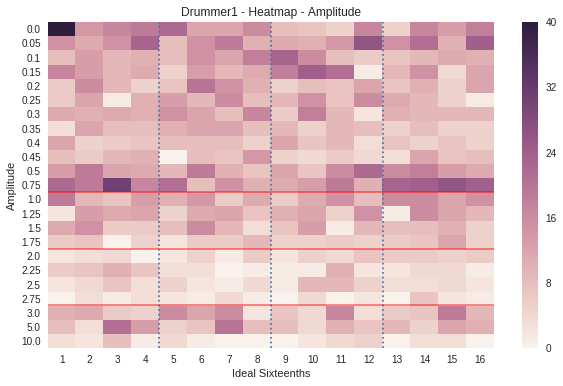

In [75]:
heatmap_draw_amplitude('drummer1_amplitude.csv', 'Drummer1 - Heatmap - Amplitude')

----------

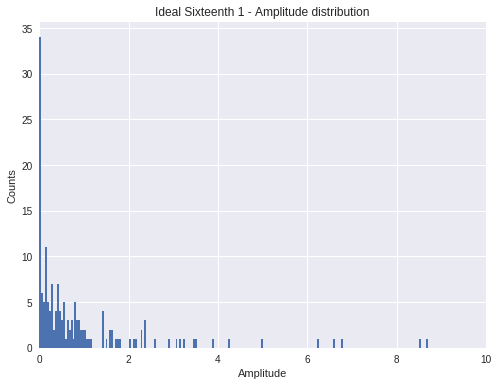

In [79]:
[0, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.20,0.25, 0.30, 0.35, 0.4, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 5, 10]

plt.figure(figsize=(8,6))
plt.xlim(0, 10)
plt.title('Ideal Sixteenth 1 - Amplitude distribution')
plt.xlabel('Amplitude')
plt.ylabel('Counts')
plt.hist(c_one.keys(), 200);

------------

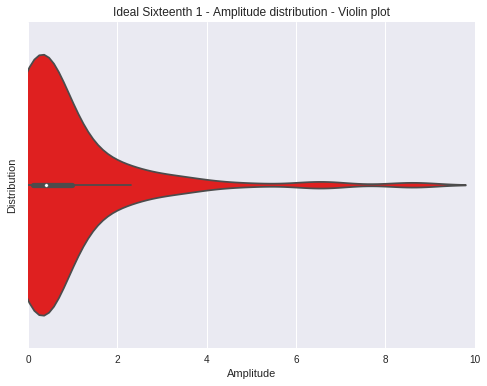

In [85]:
plt.figure(figsize=(8,6))
plt.xlim(0, 10)
plt.title('Ideal Sixteenth 1 - Amplitude distribution - Violin plot')
plt.xlabel('Amplitude')
plt.ylabel('Distribution')
sns.violinplot(c_one.keys(),color = 'red', alpha=1)

--------

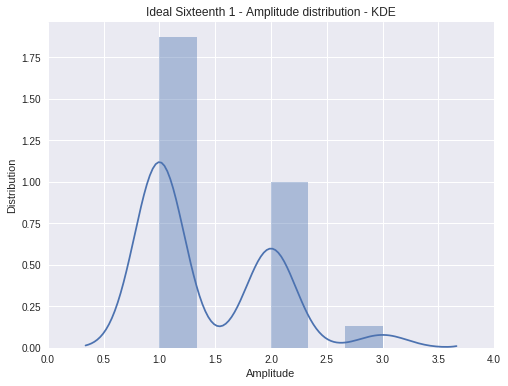

In [101]:
d = pd.DataFrame.from_dict(c_one, orient = 'index')
plt.figure(figsize=(8,6))
plt.xlim(0, 4)
plt.title('Ideal Sixteenth 1 - Amplitude distribution - KDE')
plt.xlabel('Amplitude')
plt.ylabel('Distribution')
sns.distplot(d)

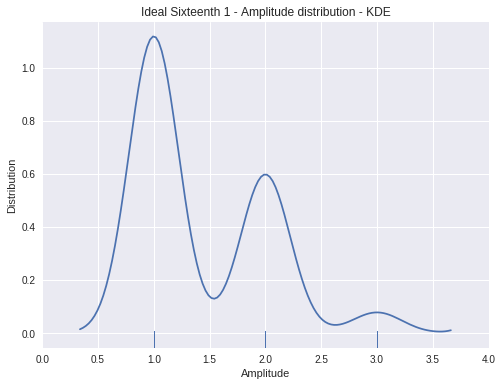

In [100]:
d = pd.DataFrame.from_dict(c_one, orient = 'index')
plt.figure(figsize=(8,6))
plt.xlim(0, 4)
plt.title('Ideal Sixteenth 1 - Amplitude distribution - KDE')
plt.xlabel('Amplitude')
plt.ylabel('Distribution')
sns.distplot(d, hist=False,  rug=True)

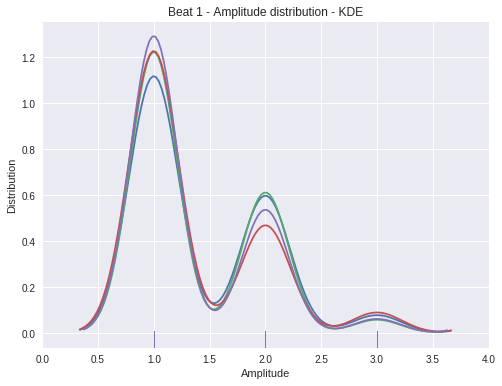

In [97]:
d = pd.DataFrame.from_dict(c_one, orient = 'index')
d2 = pd.DataFrame.from_dict(c_two, orient = 'index')
d3 = pd.DataFrame.from_dict(c_three, orient = 'index')
d4 = pd.DataFrame.from_dict(c_four, orient = 'index')
plt.figure(figsize=(8,6))
plt.xlim(0, 4)
plt.title('Beat 1 - Amplitude distribution - KDE')
plt.xlabel('Amplitude')
plt.ylabel('Distribution')
sns.distplot(d, hist=False,  rug=True)
sns.distplot(d2, hist=False,  rug=True)
sns.distplot(d3, hist=False, rug=True)
sns.distplot(d4, hist=False, rug=True)

In [4]:
beats=[]
idealSixteenths = []
init_beat = []
end_beat = []
loud_frame = []
frame = []
devs = []
loud_values = []
loud_values2 = []
lista = []
amp_values_float = []

filename = '037_phrase_disco_simple_medium_sticks.wav'
load_file = 'sounds/' + filename  

# load audio 
loader = es.MonoLoader(filename=load_file)
audio = loader()

# find beats
bt = es.BeatTrackerMultiFeature()
beats, _ = bt(audio)

# create metrical grid:
a = len(beats) - 1
init_beat = beats[0]
end_beat = beats[a]

# equally spaced lines
ids_range = len(beats)*4
idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

# compute loudness per frame
loudness = es.Loudness()
loud = loudness(audio)

for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
    loud_test = loudness(frame)
    loud_frame.append(loud_test)

#create compartments of frame
length = len(audio) / float(44100)
frame = np.linspace(0, length, len(loud_frame)) 

# read onsets
read_onset = 'onsets/' + 'onset.' + filename[:-3] + 'csv'
onsets = np.genfromtxt(read_onset)

# find nearest neighbour
for onset in onsets:
    devs.append(nearestNeighbour2(onset, idealSixteenths))

# list 2 is redundant, as it is the same as onsets
list1, list2 = zip(*devs) 

# find nearest neighbour of onset values to amplitude frame value

for myNumber in onsets:
    a = min(frame, key = lambda x:abs(x-myNumber))
    lista.append(a)

# from amplitude frame value to amplitude frame index
hopSize = 2048
fs = 44100
newMs = hopSize / float(fs)
newList = [int(x/newMs) for x in lista]

#find value to index and save it in list
list2bis = []

for i in range(len(newList)):
    a = newList[i]
    list2bis.append(loud_frame[a]) #a or a-1?

# normalising loudness
# norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]

amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    

# converting back to floats for counter   
for elem in amp_values:
    amp_values_float.append(float(elem))

length1 = len(list1)
length2 = len(amp_values_float)

if length1 == length2:
    loud_values2=zip(list1,amp_values_float)
else:
    print 'Something went wrong with your lists'

#for elements in loud_values2:
#   loud_values.append(float(elements))
loud_values.extend(loud_values2)